In [117]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import matplotlib.pyplot as plt

In [119]:
data = np.sin(np.arange(100)*0.1)

In [121]:
X,y=[],[]

In [123]:
for i in range(len(data)-10):
    X.append(data[i:i+10])
    y.append(data[i+10])

In [125]:
X,y = np.array(X),np.array(y)

In [127]:
X=X.reshape(-1,10,1)

In [129]:
model=Sequential([
    LSTM(20,input_shape=(10,1)),
    Dense(1)
])

In [131]:
model.compile(optimizer='adam',loss='mse')

In [133]:
model.fit(X,y,epochs=10,verbose=0)

In [135]:
preds = []
seq= X[-1]

In [145]:
for _ in range(10):
    next_value = model.predict(seq.reshape(-1, 10, 1), verbose=0)[0, 0]
    preds.append(next_value)
    seq = np.roll(seq, -1)
    seq[-1] = next_value

ValueError: x and y must have same first dimension, but have shapes (10,) and (30,)

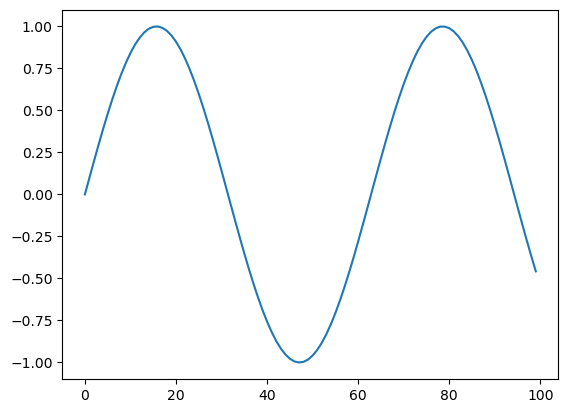

In [147]:
plt.plot(data,label="Actual")
plt.plot(range(90,100),preds,'ro-',label="Predicted")
plt.legend()
plt.show()